In [3]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from datetime import datetime, date, time
from scripts.standarise_data import count_spectrums
from matchms.importing import load_from_msp
from settings import *

data_path = '../data/processed/MS2MassBank/'
data_path_sim = '../data/processed/CosineSimilarity/'

In [4]:
print('MS dataset: ', MSrawdata)
print('Cosine tolerance: ', cosine_tolerance)

MS dataset:  MassBank_NIST_Feb20
Cosine tolerance:  0.1


In [ ]:
spectrums=[]
spectrums = list(load_from_msp(data_path+MSrawdata+"_transformed.msp"))

In [6]:
len(spectrums)

1350

In [7]:
#Calculate cosine scores using the CosineGreedy function.
#Two peaks are matched if their m/z ratios lie in a certain tolerance

from matchms import calculate_scores
from matchms.similarity import CosineGreedy

similarity_measure = CosineGreedy(tolerance=cosine_tolerance)
print('Start: ' + datetime.now().strftime('%H:%M:%S'))
scores = calculate_scores(spectrums, spectrums, similarity_measure, is_symmetric=True)
print('End: ' + datetime.now().strftime('%H:%M:%S'))

Start: 20:21:34
End: 20:22:32


In [8]:
scores.scores.data["CosineGreedy_score"]

array([1.        , 0.2541529 , 0.05724007, ..., 0.01452868, 0.01203862,
       1.        ])

In [9]:
scores_array = scores.scores.to_array()
#scores_array.tofile(data_path_sim+'cosine_scores_'+MSrawdata+'.csv', sep = ';')

In [10]:
inchikeys = [s.metadata['inchikey'] for s in spectrums]
scores_df = pd.DataFrame(scores_array["CosineGreedy_score"], index=inchikeys, columns=inchikeys)
#matches_df=pd.DataFrame(scores_array["CosineGreedy_matches"], index=inchikeys, columns=inchikeys)
scores_df.to_csv(data_path_sim + MSrawdata +"_cosine_tol"+str(cosine_tolerance)+".csv")

Text(0, 0.5, 'Spectrum #ID')

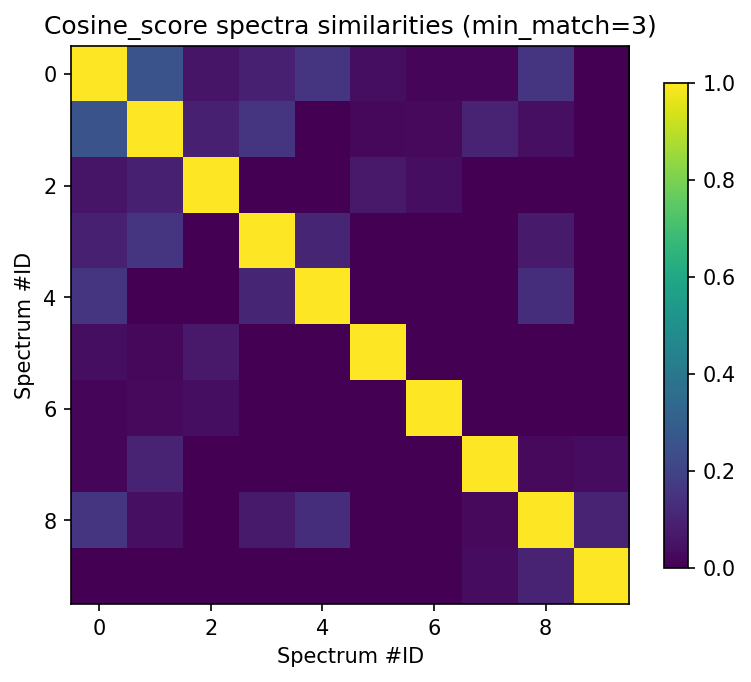

In [11]:
min_match = 3
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(scores_array[:10,:10]["CosineGreedy_score"] \
           * (scores_array[:10,:10]["CosineGreedy_matches"] >= min_match), cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Cosine_score spectra similarities (min_match=3)")
plt.xlabel("Spectrum #ID")
plt.ylabel("Spectrum #ID")